## NLP (Natural Language Processing) - 자연어 처리

* jdk download >> java 다운로드
* 다운로드한 폴더 사용자 환경 변수 PATH에 추가 (java & 하위 bin folder)
* 시스템 환경 변수 추가 (JAVA_HOME, 변수 값은 java folder 위치)

In [2]:
# !conda update conda
# !pip install --upgrade pip >> -m pip install --upgrade pip
# !pip install konlpy
# !conda install -y nltk
# !conda install -y scikit-learn >> Windows 64-bit scikit-learn can be accerelrated using scikit-learn-intelex.

In [3]:
# !pip install tweepy==3.10.0
# !conda install -y -c conda-forge wordcloud

In [4]:
# !conda install -y -c conda-forge jpype1==1.0.2

In [5]:
# import nltk
# nltk.download()

# all packages >> download punkt, stopwords

In [6]:
# import tweepy

# tweepy.__version__

In [7]:
# 작동 확인

# from konlpy.tag import Okt

# t = Okt()

### 형태소 분석

In [8]:
# Kkma 엔진

from konlpy.tag import Kkma

kkma = Kkma()

kkma.sentences('한국어 분석을 시작합니다 결과는 어떻게 되나요?') # 문장 구분

['한국어 분석을 시작합니다', '결과는 어떻게 되나요?']

In [9]:
kkma.pos('한국어 분석을 시작합니다 결과는 어떻게 되나요?') # 형태소 분석

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('결과', 'NNG'),
 ('는', 'JX'),
 ('어떻', 'VA'),
 ('게', 'ECD'),
 ('되', 'VV'),
 ('나요', 'EFQ'),
 ('?', 'SF')]

In [10]:
# Hannanum 엔진

from konlpy.tag import Hannanum

hannanum = Hannanum()

In [11]:
# 명사 분석

hannanum.nouns('한국어 분석을 시작합니다 결과는 어떻게 되나요?')

['한국어', '분석', '시작', '결과']

In [12]:
# 형태소 분석

hannanum.pos('한국어 분석을 시작합니다 결과는 어떻게 되나요?')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('결과', 'N'),
 ('는', 'J'),
 ('어떻', 'P'),
 ('게', 'E'),
 ('되', 'P'),
 ('나', 'E'),
 ('요', 'J'),
 ('?', 'S')]

In [13]:
from konlpy.tag import Okt # 바뀐 Twitter 엔진

t = Okt()

In [14]:
t.morphs('한국어 분석을 시작합니다 결과는 어떻게 되나요?')

['한국어', '분석', '을', '시작', '합니다', '결과', '는', '어떻게', '되나요', '?']

In [15]:
t.pos('한국어 분석을 시작합니다 결과는 어떻게 되나요?')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('결과', 'Noun'),
 ('는', 'Josa'),
 ('어떻게', 'Adjective'),
 ('되나요', 'Verb'),
 ('?', 'Punctuation')]

### 워드 클라우드
* 이상한 나라의 앨리스
* 스타워즈

In [16]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [17]:
text = open('../ML_data/06_alice.txt').read() # 이상한 나라의 앨리스 텍스트 파일 읽기
alice_mask = np.array(Image.open('../ML_data/06_alice_mask.png')) # 앨리스 이미지 파일 픽셀 읽기

stopwords = set(STOPWORDS) # 자연어 처리에 크게 영향을 주지 않는 것으로 인식되는 단어들 stopwords 포함
stopwords.add('said') # 앨리스 소설에 said가 많이 나오므로 stopwords 추가

In [18]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

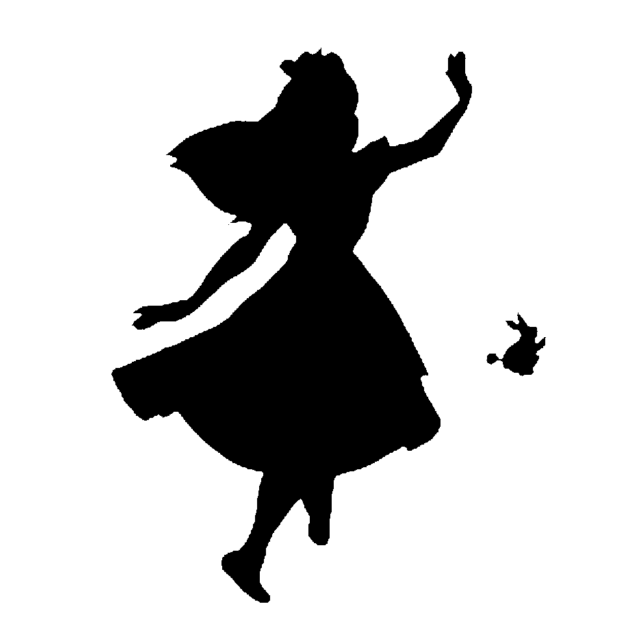

In [19]:
# 앨리스 이미지 표현하기

plt.figure(figsize=(8, 8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear') # >> cmap gray로 안하면 이상한 색으로 나옴, interploation은 박스들을 어떻게 이을 것인지 결정하는 것
plt.axis('off') # >> x, y축 없애는 옵션
plt.show()

In [20]:
# 워드클라우드 사용해보기

wc = WordCloud(
    background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords
) # 워드 클라우드 옵션 지정

wc = wc.generate(text) # 앨리스 소설로 워드클라우드 작동
wc.words_ # 단어 빈도수 조사 및 정규화 결과 확인

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

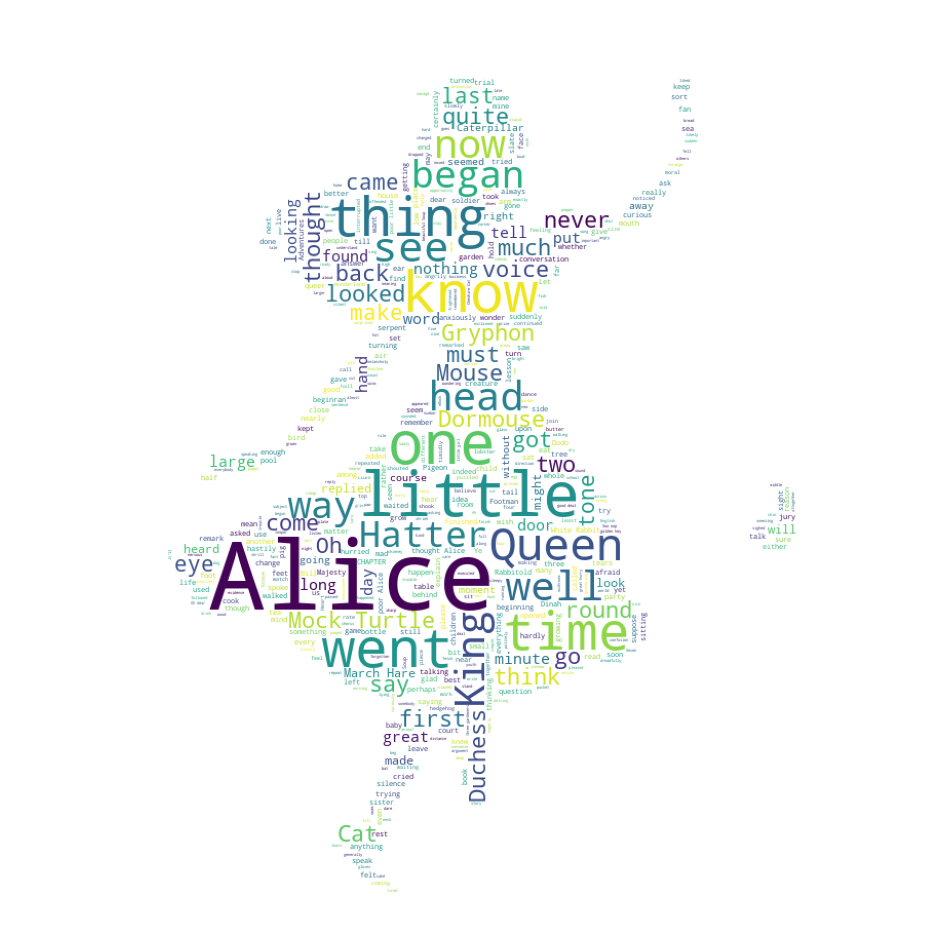

In [21]:
# 워드 클라우드로 앨리스 이미지 표현

plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [22]:
text = open('../ML_data/06_a_new_hope.txt').read() # 스타워즈 텍스트 파일 읽기

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('../ML_data/06_stormtrooper_mask.png')) # 스톰트루퍼 이미지 파일 픽셀 읽기

In [23]:
stopwords=set(STOPWORDS)

stopwords.add('int')
stopwords.add('ext')

In [24]:
wc = WordCloud(
    max_words=1000, mask=mask, stopwords=stopwords, margin=10
).generate(text)

default_colors = wc.to_array()

In [25]:
# 마스킹하는 단어 색깔을 회색으로 보이기 위한 함수 생성

import random

def grey_color_func(
    word, font_size, position, orientation, random_state=None, **kwargs
):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)


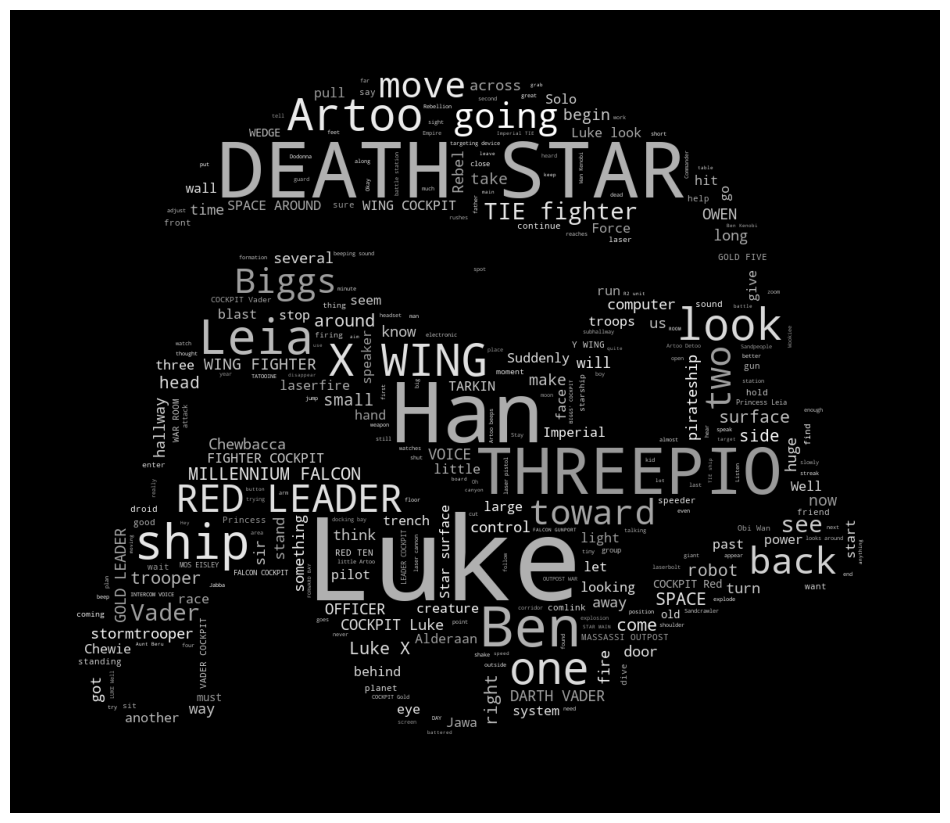

In [26]:
# 스타워즈 워드 클라우드 마스킹

plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=13))
plt.axis('off')
plt.show()

### 육아 휴직 관련 법안 분석

* KoNLPy는 대한민국 법령을 가지고 있음

In [27]:
import nltk

In [28]:
from konlpy.corpus import kobill

files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [29]:
doc_ko[:100]

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이'

In [30]:
from konlpy.tag import Okt

t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko[:10]

['지방공무원법', '일부', '개정', '법률', '안', '정의화', '의원', '대표', '발의', '의']

In [31]:
ko = nltk.Text(tokens_ko, name='육아휴직법')
ko

<Text: 육아휴직법>

In [32]:
# 명사 갯수 확인

len(ko.tokens)

735

In [33]:
# 유일한 단어 갯수 확인

len(set(ko.tokens))

250

In [34]:
# 단어 사용 빈도수 확인

ko.vocab()

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

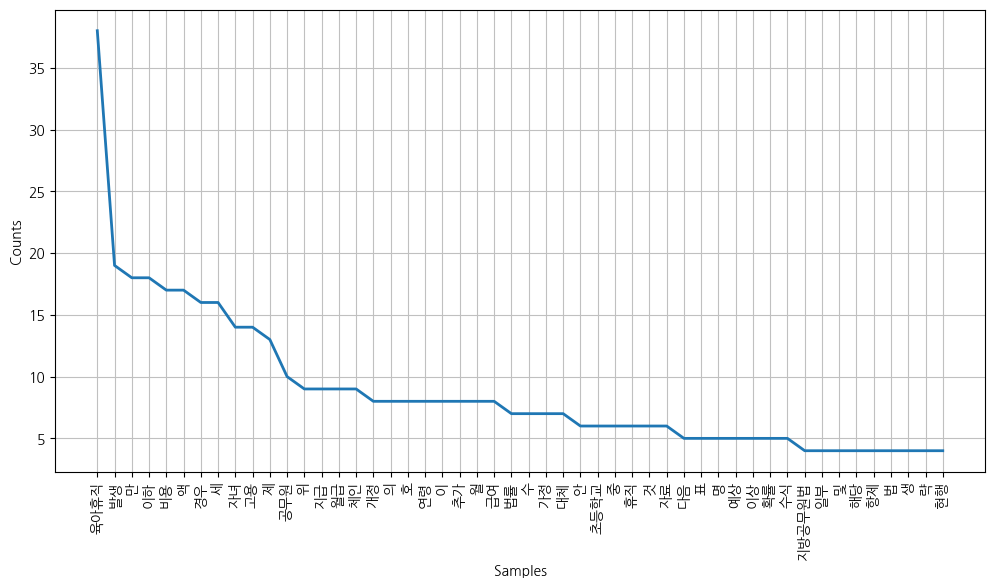

In [35]:
# 그래프화

plt.figure(figsize=(12,6))
ko.plot(50) # 내림차순 상위 50개 표현
plt.show()

In [36]:
# stop words 생성
# 한글은 상황에 따라 다른 경우가 많기 때문에...
# 특정 도메인을 지속 다루는 경우 어떠한 단어들이 stopwords에 속하는지 알게 될 것이고, 그런 것은 추후 만들어나가면 됨

stop_words = [
    '.',
    '(',
    ')',
    ',',
    "'",
    '%',
    '-',
    'X',
    ').',
    'x',
    '의',
    '자',
    '에',
    '안',
    '번',
    '호',
    '을',
    '이',
    '다',
    '만',
    '로',
    '가',
    '를'
]

In [37]:
# stopwords 해당 되는 단어 제거

ko = [each_word for each_word in ko if each_word not in stop_words]
ko[:10]

['지방공무원법', '일부', '개정', '법률', '정의화', '의원', '대표', '발의', '발의', '연월일']

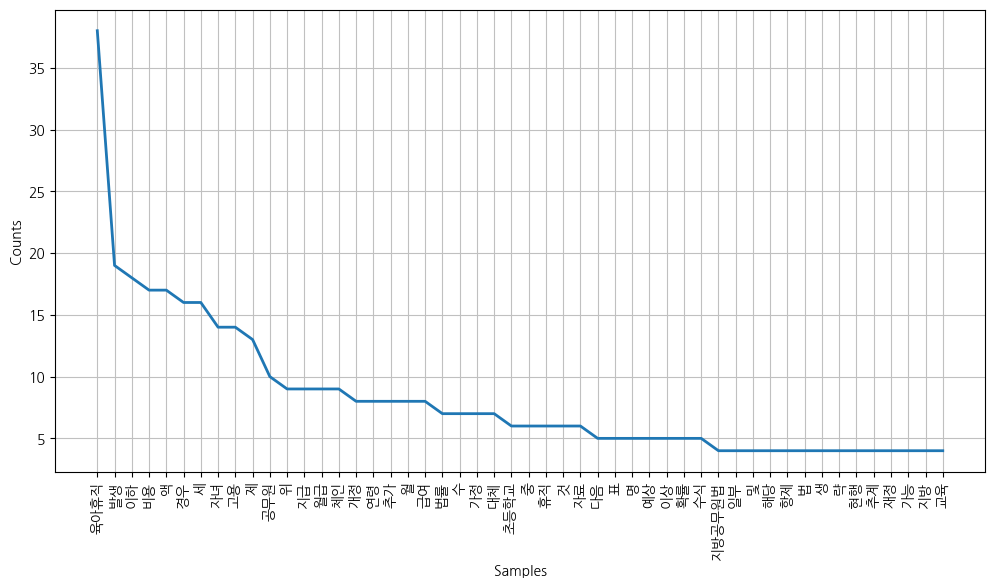

In [38]:
# 그래프화

ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50) # 내림차순 상위 50개 표현
plt.show()

In [39]:
ko.count('초등학교')

6

<Figure size 1200x600 with 0 Axes>

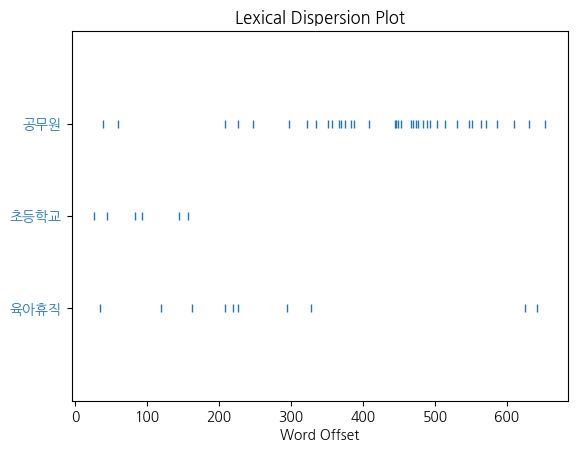

In [40]:
# 전체 단어에서 특정 단어가 어디 위치하는지 알고 싶을 때

plt.figure(figsize=(12, 6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [41]:
# 특정 단어 근처 단어 표현하여 문맥 파악

ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [42]:
# collocation : 연어 (함께 위치하는 단어들, 어휘의 조합/짝을 이루는 말들)

ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


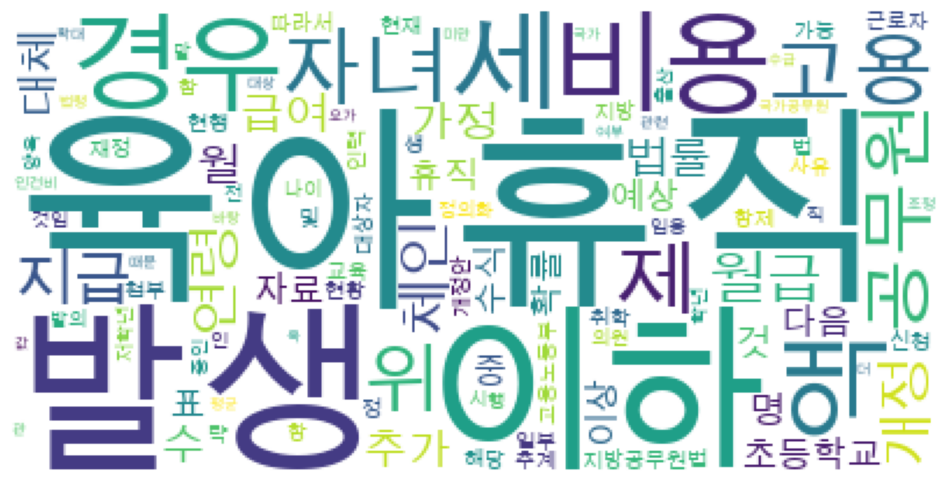

In [43]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(
    font_path = '../ML_data/Arial_Unicode.ttf',
    relative_scaling = 0.2,
    background_color = 'white'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 나이브베이즈 분류 (Naive Bayes Classification)

* 특성들 사이의 독립을 가정하는 베이즈 정리를 적용한 확률 분류기의 일종
* 텍스트 분류에 사용되어 문서를 여러 범주 중 판단하는 문제에 대해 대중적인 방법임

#### 나이브베이즈 분류를 이용한 감성분석 - 영어

In [44]:
from nltk.tokenize import word_tokenize
import nltk

In [45]:
# 나이브베이즈 분류기는 지도학습이기 때문에, 정답을 지시해주어야 함.

train = [
    ('i like you', 'pos'),
    ('i hate you', 'neg'),
    ('you like me', 'neg'),
    ('i like her', 'pos')
]

In [46]:
# train에서 사용한 전체 말 뭉치 생성

all_words = set(
    word.lower() for sentence in train for word in word_tokenize(sentence[0])
)
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

* word.lower() >> 소문자화
* for 문 두개 연달아 사용한 결과
  1. for sentence in train >> train의 원소를 가져옴
  2. for word in word_tokenize(sentence[0]) >> 해당 원소의 첫번째 구성인자 token화
  3. 위 token 소문자화
  * 즉, for문을 연달아 사용하면 순서대로 적용됨
* set()은 unique()와 같은 이유로 사용 (유일 token 집합 생성)

In [47]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'like': True,
   'i': True,
   'me': False,
   'her': False,
   'you': True,
   'hate': False},
  'pos'),
 ({'like': False,
   'i': True,
   'me': False,
   'her': False,
   'you': True,
   'hate': True},
  'neg'),
 ({'like': True,
   'i': False,
   'me': True,
   'her': False,
   'you': True,
   'hate': False},
  'neg'),
 ({'like': True,
   'i': True,
   'me': False,
   'her': True,
   'you': False,
   'hate': False},
  'pos')]

* {word ~ all_words} >> 생성한 말 뭉치가 문장 (토큰화)에 있는지 확인
* x[1] >> pos, neg 표시용
* for x in train >> 문장 불러오는 용

In [48]:
# 분류기 훈련

classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


* 결과 해석
  - hate가 없으면 positive:negative 확률이 1.7:1.0이다 라는 식

In [49]:
# 테스트 문장에 말 뭉치 대조하여 확인

test_sentence = 'i like MeRui'
test_sent_features = {
    word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words
}
test_sent_features

{'like': True,
 'i': True,
 'me': False,
 'her': False,
 'you': False,
 'hate': False}

In [50]:
# 분류

classifier.classify(test_sent_features)

'pos'

#### 나이브베이즈 분류를 이용한 감성분석 - 한글

In [51]:
# Okt 엔진 사용, 학습할 문장 제시

from konlpy.tag import Okt

pos_tagger = Okt()

train = [
    ('메리가 좋아', 'pos'),
    ('고양이도 좋아', 'pos'),
    ('난 수업이 지루해', 'neg'),
    ('메리는 이쁜 고양이야', 'pos'),
    ('난 마치고 메리랑 놀거야', 'pos')
]

In [52]:
all_words = set(
    word.lower() for sentence in train for word in word_tokenize(sentence[0])
)
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

* 고양이도, 고양이야 / 메리가, 메리는, 메리랑 >> 모두 다른 단어로 인식되는 것을 확인할 수 있음
* 이로 인해 형태소 분석이 필요함

In [53]:
# 형태소 분석 및 품사를 뒤에 붙이는 함수 생성

def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]


In [54]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [55]:
# 위에서 생성한 내용을 풀어서 말 뭉치 생성

tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [56]:
# 단어 존재 유무 반환하는 함수 생성

def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [57]:
# 형태소 분석한 train_docs를 이용하여 단어 유무 확인

train_xy = [(term_exists(d), c) for d, c in train_docs]
train_xy[:1]

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos')]

In [58]:
# 분류

classifier = nltk.NaiveBayesClassifier.train(train_xy)
classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0


In [59]:
# test sentence 이용하여 분류 확인

test_sentence = '난 수업이 마치면 메리랑 놀거야'

test_docs = pos_tagger.pos(test_sentence)
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [60]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

* 위 방법이 잘못된 점
  - 훈련을 단어/품사로 시켰는데, 이 두 가지가 떨어진 것을 test했기에 존재하는 단어도 존재하지 않는다고 판단함
  - 고로, 이전 방법과 같이 단어/품사로 변형시킨다음에 분류해야 됨

In [61]:
test_sentence2 = '난 수업이 지루하고 싫다'

test_docs2 = tokenize(test_sentence2)
test_docs2

['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective', '싫다/Adjective']

In [62]:
test_sent_features2 = {word: (word in tokens) for word in test_docs2}
test_sent_features2

{'난/Noun': True,
 '수업/Noun': True,
 '이/Josa': True,
 '지루하다/Adjective': True,
 '싫다/Adjective': False}

In [63]:
classifier.classify(test_sent_features2)

'neg'

## 문장 유사도 측정

### Count Vectorizer

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)

In [71]:
# 훈련용 문장 제시
# 거리를 구하는 것이기 때문에 지도할 내용은 없음

contents = ['상처받은 아이들은 너무 일찍 커버려',
            '내가 상처받은 거 아는 사람 불편해',
            '잘 사는 사람들은 좋은 사람 되기 쉬워',
            '아무 일도 아니야 괜찮아']

In [72]:
# 형태소 분석

from konlpy.tag import Okt

t = Okt()

contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['상처', '받은', '아이', '들', '은', '너무', '일찍', '커버', '려'],
 ['내', '가', '상처', '받은', '거', '아는', '사람', '불편해'],
 ['잘', '사는', '사람', '들', '은', '좋은', '사람', '되기', '쉬워'],
 ['아무', '일도', '아니야', '괜찮아']]

In [73]:
# 형태소 분석 결과 다시 합침


contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    contents_for_vectorize.append(sentence)

contents_for_vectorize

[' 상처 받은 아이 들 은 너무 일찍 커버 려',
 ' 내 가 상처 받은 거 아는 사람 불편해',
 ' 잘 사는 사람 들 은 좋은 사람 되기 쉬워',
 ' 아무 일도 아니야 괜찮아']

In [74]:
# Vectorize 수행

X = vectorizer.fit_transform(contents_for_vectorize)
X

<4x17 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [76]:
# samples = 문장 갯수
# features = 전체 말 뭉치 갯수

num_samples, num_features = X.shape
num_samples, num_features

(4, 17)

In [86]:
# feature 확인
# .get_feature_names_out()은 array 반환함

list(vectorizer.get_feature_names_out())

['괜찮아',
 '너무',
 '되기',
 '받은',
 '불편해',
 '사는',
 '사람',
 '상처',
 '쉬워',
 '아는',
 '아니야',
 '아무',
 '아이',
 '일도',
 '일찍',
 '좋은',
 '커버']

In [87]:
# 위 feature들이 어떤 문장에 몇 번 들어가있는지 확인 가능

X.toarray().transpose()

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 2, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]], dtype=int64)

In [88]:
# 테스트용 문장

new_post = ['상처받기 싫어 괜찮아']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 상처 받기 싫어 괜찮아']

In [89]:
# 테스트용 문장 벡터 표현

new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [91]:
# 단순 기하학적 거리 사용

import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [92]:
dist = [dist_raw(each, new_post_vec) for each in X]
dist

[2.449489742783178, 2.23606797749979, 3.1622776601683795, 2.0]

In [94]:
print('Best post is ', dist.index(min(dist)), ', dist = ', min(dist))
print('Test post is --> ', new_post[0])
print('Best dist post is --> ', contents[dist.index(min(dist))])

Best post is  3 , dist =  2.0
Test post is -->  상처받기 싫어 괜찮아
Best dist post is -->  아무 일도 아니야 괜찮아


### TF-IDF Vectorizer

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [96]:
# fit

X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 17)

In [98]:
# count와 다르게 tf, idf가 반영되어 다른 숫자들이 나오는 것을 볼 수 있음

X.toarray().transpose()

array([[0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.40104275, 0.6191303 , 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.43671931, 0.        , 0.        , 0.        ]])

In [100]:
# 테스트 문장 벡터화

new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray().transpose()

array([[0.78528828],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.6191303 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [101]:
# 거리를 구하는 함수 - normalize 시켜서 거리 구함

def dist_norm(v1, v2):
    v1_normalized = v1 /sp.linalg.norm(v1.toarray())
    v2_normalized = v2 /sp.linalg.norm(v2.toarray())

    delta = v1_normalized - v2_normalized

    return sp.linalg.norm(delta.toarray())

In [102]:
dist = [dist_norm(each, new_post_vec) for each in X]

print('Best post is ', dist.index(min(dist)), ', dist = ', min(dist))
print('Test post is --> ', new_post[0])
print('Best dist post is --> ', contents[dist.index(min(dist))])

Best post is  3 , dist =  1.1021396119773588
Test post is -->  상처받기 싫어 괜찮아
Best dist post is -->  아무 일도 아니야 괜찮아


### 네이버 API를 통해 유사 질문 찾기

In [103]:
import urllib.request
import json
import datetime

In [112]:
# 네이버 api url 함수 선언

def gen_search_url(api_node, search_text, start_num, disp_num):
    base = 'https://openapi.naver.com/v1/search'
    node = '/' + api_node + '.json'
    param_query = '?query=' + urllib.parse.quote(search_text)
    param_start = '&start=' + str(start_num)
    param_disp = '&display=' + str(disp_num)

    return base + node + param_query + param_start + param_disp

In [113]:
# 네이버 url page 정보 가져오는 함수 선언

def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header('X-Naver-Client-Id', client_id)
    request.add_header('X-Naver-Client-Secret', client_secret)

    response = urllib.request.urlopen(request)

    print('[%s] Url Request Success' % datetime.datetime.now())

    return json.loads(response.read().decode('utf-8'))

In [114]:
# 네이버 API 사용에 필요한 client_id, secret 선언
# url 적용할 파트 (지식인, 도서...), 키워드, 보일 항목 갯수 설정 후 결과 확인

client_id = "vFEuXx4wKKgRduUHv1LL"
client_secret = "XtWBnGKhto"

url = gen_search_url('kin', '파이썬', 1, 100)
one_result = get_result_onpage(url)
one_result['items'][0]

[2023-08-31 18:31:08.880010] Url Request Success


{'title': '<b>파이썬</b> 질문',
 'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10402&docId=450257380&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
 'description': '... 문제라는데 <b>파이썬</b>은 원래 변수 선언을 안하나요??? c언어에서는 int i=0; 이렇게 i를 선언하는데 <b>파이썬</b>은... <b>파이썬</b>에서는 변수 선언을 하지 않습니다. 2. print의 기본이 라인바꿈을 포함합니다/ 라인을 바꾸지... '}

In [115]:
# 내용만 따로 발췌

one_result['items'][0]['description']

'... 문제라는데 <b>파이썬</b>은 원래 변수 선언을 안하나요??? c언어에서는 int i=0; 이렇게 i를 선언하는데 <b>파이썬</b>은... <b>파이썬</b>에서는 변수 선언을 하지 않습니다. 2. print의 기본이 라인바꿈을 포함합니다/ 라인을 바꾸지... '

In [111]:
# 태그 제거 함수 선언

def delete_tag(input_str):
    input_str = input_str.replace('<b>', '')
    input_str = input_str.replace('</b>', '')
    return input_str

In [116]:
# description 만 가져오는 함수 선언 (내부에 태그 제거 함수 활용)

def get_description(pages):
    contents = []

    for sentences in pages['items']:
        contents.append(delete_tag(sentences['description']))

    return contents

In [117]:
contents = get_description(one_result)
contents[:10]

['... 문제라는데 파이썬은 원래 변수 선언을 안하나요??? c언어에서는 int i=0; 이렇게 i를 선언하는데 파이썬은... 파이썬에서는 변수 선언을 하지 않습니다. 2. print의 기본이 라인바꿈을 포함합니다/ 라인을 바꾸지... ',
 '파이썬의 다양한 기본적인 내장 함수가 있겠지만 CPython (기본적인 파이썬)에서 곱셈 연산자( * )이... 파이썬은 C로 작성 되었으며 C에서도 곱셈은 * 입니다. 백준 2588번: 곱셈 [C] [B3] : 네이버 블로그 (naver.... ',
 '파이썬, 파이참, 파이썬 IDLE, VSCODE 등... 차이점이 명확히 뭔가요..?  도움이 되셨다면 채택바랍니다. 파이썬 &gt; 프로그램을 만들 수 있는 언어 입니다. 프로그램 랭귀지 또는 프로그래밍 언어 라고 하는 C, C++, 비주얼베이직 등과 같은... ',
 '파이썬 질문입니다. 파이썬에서 이렇게 결과가 나오려면 fpr문 안에 코드를 어떻게 넣어야 하나요?? 빈칸에 들어갈 내용 : result.append(number * 2) [소스코드] [실행결과 캡쳐] ',
 '... 취업을 하려고하는데 파이썬자격증이 궁금해요. 많이 사용되는 언어 중에서 파이썬 관련하여 자격증을... 집은 합정이고 홍대 또는 신촌쪽 파이썬자격증 학원을 알아보고 있습니다. 그리고 파이썬자격증 시험 정보도 알려줄... ',
 'NFT 이미지 조합을 할려고 영상을 보면서 파이썬을 설치를... 영상에서 파이썬 3.10부터는 Window 7이상이 아닐 경우에는버전... ▲(제꺼) 파이썬 설치시 맨처음 위의 사진처럼 뜹니다. ▲다른 영상들의 파이썬 맨 처음 설치창 ▲(제꺼)... ',
 '자바를 학원에서 배우고 c언어랑 파이썬은 독학하는게 좋을까요?아니면 셋다 학원에서 배우는게 좋을까요?... 근데 굳이 자바 C언어 파이썬을 전부 배우실 필요는 딱히 없어요. 본인 목적에 맞는 언어만 공부하시면 됩니다. 자세하게... ',
 'c언어는 비주얼스튜디오쓰는데 파이썬도 이거 쓰나요? 파이썬은 Visu

In [127]:
# count vectorizer 활용

from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

t = Okt()
vectorizer = CountVectorizer(min_df=1)

In [128]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens[0]

['...',
 '문제',
 '라는',
 '데',
 '파이썬',
 '은',
 '원래',
 '변수',
 '선언',
 '을',
 '안하나요',
 '???',
 'c',
 '언어',
 '에서는',
 'int',
 'i',
 '=',
 '0',
 ';',
 '이렇게',
 'i',
 '를',
 '선언',
 '하는데',
 '파이썬',
 '은',
 '...',
 '파이썬',
 '에서는',
 '변수',
 '선언',
 '을',
 '하지',
 '않습니다',
 '.',
 '2',
 '.',
 'print',
 '의',
 '기본',
 '이',
 '라인',
 '바꿈',
 '을',
 '포함',
 '합니다',
 '/',
 '라인',
 '을',
 '바꾸지',
 '...']

In [129]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    contents_for_vectorize.append(sentence)

contents_for_vectorize[:10]

[' ... 문제 라는 데 파이썬 은 원래 변수 선언 을 안하나요 ??? c 언어 에서는 int i = 0 ; 이렇게 i 를 선언 하는데 파이썬 은 ... 파이썬 에서는 변수 선언 을 하지 않습니다 . 2 . print 의 기본 이 라인 바꿈 을 포함 합니다 / 라인 을 바꾸지 ...',
 ' 파이썬 의 다양한 기본 적 인 내장 함수 가 있겠지만 CPython ( 기본 적 인 파이썬 ) 에서 곱셈 연산자 ( * ) 이 ... 파이썬 은 C 로 작성 되었으며 C 에서도 곱셈 은 * 입니다 . 백 준 2588 번 : 곱셈 [ C ] [ B 3 ] : 네이버 블로그 ( naver ....',
 ' 파이썬 , 파 이참 , 파이썬 IDLE , VSCODE 등 ... 차이점 이 명확히 뭔가 요 ..? 도움 이 되셨다면 채택 바랍니다 . 파이썬 & gt ; 프로그램 을 만들 수 있는 언어 입니다 . 프로그램 랭귀 지 또는 프로그래밍 언어 라고 하는 C , C ++, 비주얼베이직 등 과 같은 ...',
 ' 파이썬 질문 입니다 . 파이썬 에서 이렇게 결과 가 나오려면 fpr 문 안 에 코드 를 어떻게 넣어야 하나요 ?? 빈칸 에 들어갈 내용 : result . append ( number * 2 ) [ 소스코드 ] [ 실행 결과 캡쳐 ]',
 ' ... 취업 을 하려고하는데 파이썬 자격증 이 궁금해요 . 많이 사용 되는 언어 중 에서 파이썬 관련 하여 자격증 을 ... 집은 합 정이 고 홍대 또는 신촌 쪽 파이썬 자격증 학원 을 알아보고 있습니다 . 그리고 파이썬 자격증 시험 정보 도 알려줄 ...',
 ' NFT 이미지 조합 을 할려고 영상 을 보면서 파이썬 을 설치 를 ... 영상 에서 파이썬 3.10 부터는 Window 7 이상 이 아닐 경우 에는 버전 ... ▲ ( 제 꺼 ) 파이썬 설치시 맨 처음 위 의 사진 처럼 뜹니다 . ▲ 다른 영상 들 의 파이썬 맨 처음 설치 창 ▲ ( 제 꺼 )...',
 ' 자바 를 학원 에서 배우고 c 언어 랑 파이썬 은 독학 하는게 

In [130]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<100x1131 sparse matrix of type '<class 'numpy.int64'>'
	with 2218 stored elements in Compressed Sparse Row format>

In [131]:
num_samples, num_features = X.shape
num_samples, num_features

(100, 1131)

In [132]:
new_post = ['파이썬을 배우는데 좋은 책이 어떤 것인지 추천해주세요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 파이썬 을 배우는데 좋은 책 이 어떤 것 인지 추천 해주세요']

In [135]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [137]:
dist = [dist_raw(each, new_post_vec) for each in X]
dist[:10]

[6.782329983125268,
 6.082762530298219,
 6.164414002968976,
 5.385164807134504,
 7.211102550927978,
 7.0710678118654755,
 7.0710678118654755,
 3.7416573867739413,
 7.810249675906654,
 6.324555320336759]

In [138]:
print('Best post is ', dist.index(min(dist)), ', dist = ', min(dist))
print('Test post is --> ', new_post[0])
print('Best dist post is --> ', contents[dist.index(min(dist))])

Best post is  7 , dist =  3.7416573867739413
Test post is -->  파이썬을 배우는데 좋은 책이 어떤 것인지 추천해주세요
Best dist post is -->  c언어는 비주얼스튜디오쓰는데 파이썬도 이거 쓰나요? 파이썬은 Visual Studio, Pycharm 다 쓸 수 있습니다. 


* 관련 없어 보이는 질문이 유사하다고 나오는 이유는 각 형태소가 얼마나 포함되어 있는지에 따라 유사성이 정해지기 때문임
* 책이라는 단어에 가중치가 더해지길 원한다면 tfidf를 사용해보는 것이 좋고 추가로 다른 parameter 건드릴 것이 있는지 확인해봐야 함.